In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Get data

In [261]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
datasets = [train, test]

### **data preprocessing**

In [262]:
# basic preproc

for df in datasets:
    df.set_index('PassengerId', inplace=True)
    df.drop(['Name', 'Cabin'], axis=1, inplace=True)
    

handle missing values :
VIP: we can fillna with False since only 2% of passengers are VIP
CryoSleep: since this one has a great predictive power, we don't want to take any risk so let's just drop it

convert boolean to integer


In [263]:
for df in datasets:
    df['VIP'].fillna(False, inplace=True)
    
    #df.dropna(subset=['CryoSleep'], inplace=True)
    df['CryoSleep'] = df['CryoSleep'].fillna(False)
    
    
    df['CryoSleep'] = df['CryoSleep'].astype(int)
    df['VIP'] = df['VIP'].astype(int)

encoding

In [264]:
home_planet_encoder = {'Europa': 1, 'Mars':'2', 'Earth':3}
destination_encoder = {'55 Cancri e':1,'PSO J318.5-22':2,'TRAPPIST-1e':3}

for df in datasets:
    df['HomePlanet'] = df['HomePlanet'].map(home_planet_encoder)
    df['Destination'] = df['Destination'].map(destination_encoder)
    


handle missing values

In [265]:
for df in datasets:
    df.fillna(df.median(), inplace=True)

## data analysis

In [266]:
print(train['HomePlanet'].value_counts())
print(train['CryoSleep'].value_counts())
print(train['Destination'].value_counts())
print(train['VIP'].value_counts())

HomePlanet
3    4803
1    2131
2    1759
Name: count, dtype: int64
CryoSleep
0    5656
1    3037
Name: count, dtype: int64
Destination
3.0    6097
1.0    1800
2.0     796
Name: count, dtype: int64
VIP
0    8494
1     199
Name: count, dtype: int64


In [267]:
# check missing values
train.shape[0] - train.dropna().shape[0]

0

In [268]:
# check transported repartition
train['Transported'].mean()

0.5036236051995858

In [269]:
# check for data importance

def ratio(series) -> float:
    return 100 * sum(series)/len(series)

def inspect_transported_by(label:str):
    print(train[['HomePlanet','Transported']]
        .groupby(['HomePlanet']).mean()
        .sort_values(by='Transported', ascending=False)
    )

train['Transported'] = train['Transported'].astype(int)

print(train.columns.drop(['Transported']))

for col in ['HomePlanet', 'CryoSleep', 'Destination','VIP']:
    print(train[[col,'Transported']]
        .groupby([col]).mean()
        .sort_values(by='Transported', ascending=False)
    )



Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')
            Transported
HomePlanet             
1              0.658846
2              0.523024
3              0.427649
           Transported
CryoSleep             
1             0.817583
0             0.335042
             Transported
Destination             
1.0             0.610000
2.0             0.503769
3.0             0.472199
     Transported
VIP             
0       0.506475
1       0.381910


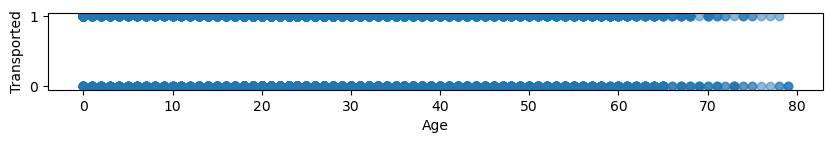

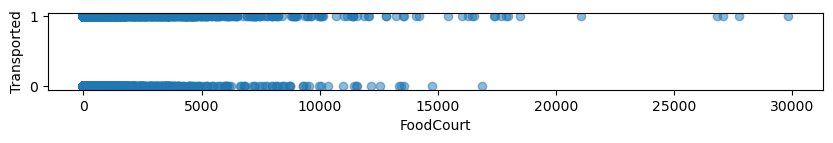

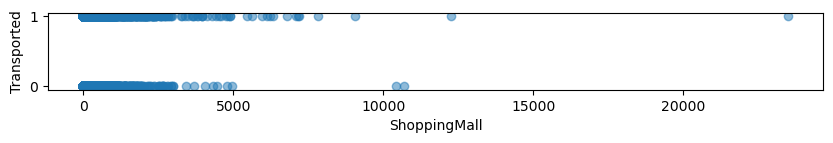

In [270]:
def plot(label:str):
    plt.figure(figsize=(10, 1))
    plt.scatter(train[label], train['Transported'], alpha=0.5)
    plt.xlabel(label)
    plt.ylabel('Transported')
    
plot('Age')    

money_spent_labels = [ 'FoodCourt', 'ShoppingMall']
for label in money_spent_labels:
    plot(label)
    
# train['TotalSpent'] = train[['RoomService','Spa', 'VRDeck']].sum(axis=1)
# plot('TotalSpent')

## Model & prediction ##

In [271]:
y = datasets[0]['Transported']
X = datasets[0].drop('Transported', axis=1)
X_test = datasets[1]

In [272]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X,y)
pred = model.predict(X_test)

# save prediction
pred_df = pd.DataFrame(pred, index=X_test.index, columns=["Transported"])
pred_df['Transported'] = pred_df['Transported'].astype(bool)
pred_df.to_csv("predictions/first_predict.csv")